### mount a Google drive

In [1]:
import os
from google.colab import drive
drive.mount('/gdrive')
os.symlink('/gdrive/My Drive', '/content/gdrive')
!ls -l /content/gdrive/

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive
total 1058075
-rw------- 1 root root 334986751 Sep 25 11:29 224_pre.h5
-rw------- 1 root root 334986751 Sep 25 12:28 299_pre.h5
drwx------ 2 root root      4096 Sep 25 11:05 Colab Notebooks
drwx------ 2 root root      4096 Sep 25 12:41 co_tips
drwx------ 2 root root      4096 Sep 21 07:02 data
-rw------- 1 root root    173874 Sep 27 12:45 DragonQuestAI.ipynb
-rw------- 1 root root    568863 Sep 25 12:37 foxes_test_results.csv
-rw------- 1 root root   1646032 Sep 21 0

In [0]:
#%reload_ext autoreload
#%autoreload 2
%matplotlib inline


### data preprocessing





In [0]:
PATH = "/content/gdrive/co_tips/co_tips2/Orientation4/"

In [215]:
!ls {PATH}

A180421.165002.dat  A180421.180904.dat	A180421.211048.dat  A180422.124930.dat
A180421.170237.dat  A180421.195425.dat	A180421.213138.dat  A180422.130951.dat
A180421.172420.dat  A180421.202553.dat	A180421.215243.dat
A180421.174714.dat  A180421.204720.dat	A180422.122803.dat


In [4]:
files = !ls $PATH  | grep "dat" ;# | head
print(files)

['A180421.165002.dat', 'A180421.170237.dat', 'A180421.172420.dat', 'A180421.174714.dat', 'A180421.180904.dat', 'A180421.195425.dat', 'A180421.202553.dat', 'A180421.204720.dat', 'A180421.211048.dat', 'A180421.213138.dat', 'A180421.215243.dat', 'A180422.122803.dat', 'A180422.124930.dat', 'A180422.130951.dat']


In [214]:
import time
import binascii
import csv
files[5]

'A180421.195425.dat'

In [216]:
# Open the Createc DAT file. If nothing, return an error
from __future__ import with_statement

try:
    with open(PATH+files[5], mode='rb') as binary_file:
        data = binary_file.read()
        print(data[0:35])
except IOError as error:                    # <- with doesn't have an except clause.
        print('oops! File not found or can not be read.')     

b'[Paramco32]\r\nDAC-Type=20bit\r\nTitel '


In [9]:
if b'[Parameter]' in data:
     STMAFMVersion = 1
elif b'[Paramet32]' in data:
     STMAFMVersion = 2
elif b'[Paramco32]' in data:
     STMAFMVersion = 3
else:
# If none of these is found, stop and signal file error.
    print ('Createc DAT file version does not match')
STMAFMVersion 

3

In [0]:
# Read out all header information until the max header byte of 16384 bytes.
header_size=16384
header_binary =data[0:header_size]


In [58]:
'''
data[header_size-29:header_size+30]

b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\nDATAx\x9c\\\xdd}\xb0\xe5\xc9Y\xd0\xf1\r\xb2\x05(\x82\x88\x1b`\x01w\x017\x82) \x85\xab\x10I'

In [58]:
'''
z=chr(13);z

'\r'

In [0]:
idx = header_binary.index(b'DSP-COMPDATE');idx
header_binary = header_binary[:idx] + b'\r' + header_binary[idx:];

In [12]:
header_binary=header_binary.splitlines();header_binary

[b'[Paramco32]',
 b'DAC-Type=20bit',
 b'Titel / Titel=LHeNew',
 b'Delta X / Delta X [Dac]=10',
 b'Delta Y / Delta Y [Dac]=10',
 b'Num.X / Num.X=256',
 b'Num.Y / Num.Y=256',
 b'Delay X+ / Delay X+=1',
 b'Delay X- / Delay X-=1',
 b'Delay Y / Delay Y=1',
 b'DX_DIV_DDelta-X / DX/DDeltaX=469',
 b'GainX / GainX=10',
 b'GainY / GainY=10',
 b'GainZ / GainZ=3',
 b'Rotation / Rotation=0.00',
 b'  /  = ',
 b'BiasVoltage / BiasVolt.[mV]=250.00',
 b'Gainpreamp / GainPre 10^=9',
 b'Chan(1,2,4) / Chan(1,2,4)=4',
 b'  /  = ',
 b'PlanDx / PlanDx=0.0970',
 b'PlanDy / PlanDy=-0.1020',
 b'Scanrotoffx / OffsetX=101048.0',
 b'Scanrotoffy / OffsetY=-14244.0',
 b'  /  = ',
 b'MVolt_1 / MVolt_1=0',
 b'MVolt_2 / MVolt_2=0',
 b'MVolt_3 / MVolt_3=0',
 b'MVolt_4 / MVolt_4=0',
 b'MVolt_5 / MVolt_5=0',
 b'MVolt_6 / MVolt_6=0',
 b'  /  = ',
 b'  /  = ',
 b'RepeatRotinc / RepeatRotinc=0',
 b'RptBVoltinc / RptBVoltinc=0',
 b'Repeatinterval / Repeatinterval=0',
 b'Repeatcounter / Repeatcounter=0',
 b'RepeatXoffset / Rep

In [13]:
ind = [i for i, s in enumerate(header_binary) if b'DSP-COMPDATE' in s][0]; header_binary[ind]


b'DSP-COMPDATE= Apr 29 2015 '

In [14]:
bytes(10)

b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'

In [0]:
import pandas as pd

d = []
for i in range(1,ind):
    tmp=header_binary[i].split(b'=');
    d.append((tmp[0],tmp[1]))
SplittedLine=pd.DataFrame(d, columns=('parameter', 'value'))

In [16]:
SplittedLine.head(20)

,parameter,value
0,b'DAC-Type',b'20bit'
1,b'Titel / Titel',b'LHeNew'
2,b'Delta X / Delta X [Dac]',b'10'
3,b'Delta Y / Delta Y [Dac]',b'10'
4,b'Num.X / Num.X',b'256'
5,b'Num.Y / Num.Y',b'256'
6,b'Delay X+ / Delay X+',b'1'
7,b'Delay X- / Delay X-',b'1'
8,b'Delay Y / Delay Y',b'1'
9,b'DX_DIV_DDelta-X / DX/DDeltaX',b'469'


In [0]:
# Header Values
# Read in header values from the split data.
 
Header={}
Header['ScanPixels_X'] = int(SplittedLine.loc[SplittedLine['parameter'] == b'Num.X / Num.X'].value.item());
Header['ScanPixels_Y'] = int(SplittedLine.loc[SplittedLine['parameter'] == b'Num.Y / Num.Y'].value.item());
Header['GainX'] = float(SplittedLine.loc[SplittedLine['parameter'] == b'GainX / GainX'].value.item());
Header['GainY'] = float(SplittedLine.loc[SplittedLine['parameter'] == b'GainY / GainY'].value.item());
Header['GainZ'] = float(SplittedLine.loc[SplittedLine['parameter'] == b'GainZ / GainZ'].value.item());

Header['GainPreamplifier'] = float(SplittedLine.loc[SplittedLine['parameter'] == b'Gainpreamp / GainPre 10^'].value.item());
Header['ChannelCount'] = int(SplittedLine.loc[SplittedLine['parameter'] == b'Channels / Channels'].value.item());
Header['DACToZConversionFactor'] = float(SplittedLine.loc[SplittedLine['parameter'] == b'Dacto[A]z'].value.item());
Header['DACToXYConversionFactor'] = float(SplittedLine.loc[SplittedLine['parameter'] == b'Dacto[A]xy'].value.item());
Header['ScanRange_X'] = float(SplittedLine.loc[SplittedLine['parameter'] == b'Length x[A]'].value.item());
Header['ScanRange_Y'] = float(SplittedLine.loc[SplittedLine['parameter'] == b'Length y[A]'].value.item());
Header['ScanOffset_X'] = float(SplittedLine.loc[SplittedLine['parameter'] == b'Scanrotoffx / OffsetX'].value.item());
Header['ScanOffset_Y'] = float(SplittedLine.loc[SplittedLine['parameter'] == b'Scanrotoffy / OffsetY'].value.item());
 

Header['Bias'] = float(SplittedLine.loc[SplittedLine['parameter'] == b'Biasvolt[mV]'].value.item());
Header['Current'] = float(SplittedLine.loc[SplittedLine['parameter'] == b'Current[A]'].value.item());
Header['ACQ_Time'] = float(SplittedLine.loc[SplittedLine['parameter'] == b'Sec/Image:'].value.item());
Header['ScanAngle'] = float(SplittedLine.loc[SplittedLine['parameter'] == b'Rotation / Rotation'].value.item());
     


Header['ZControllerSetpoint'] = float(SplittedLine.loc[SplittedLine['parameter'] == b'FBLogIset'].value.item());
Header['ZControllerIntegralGain'] = float(SplittedLine.loc[SplittedLine['parameter'] == b'FBIntegral'].value.item());
Header['ZControllerProportionalGain'] = float(SplittedLine.loc[SplittedLine['parameter'] == b'FBProp'].value.item());
Header['PiezoX'] = float(SplittedLine.loc[SplittedLine['parameter'] == b'Xpiezoconst'].value.item());
          

In [19]:
Header

{'ACQ_Time': 1229.455,
 'Bias': 250.0,
 'ChannelCount': 4,
 'Current': 9.3e-12,
 'DACToXYConversionFactor': 0.00066,
 'DACToZConversionFactor': 0.00016,
 'GainPreamplifier': 9.0,
 'GainX': 10.0,
 'GainY': 10.0,
 'GainZ': 3.0,
 'PiezoX': 34.44,
 'ScanAngle': 0.0,
 'ScanOffset_X': 101048.0,
 'ScanOffset_Y': -14244.0,
 'ScanPixels_X': 256,
 'ScanPixels_Y': 256,
 'ScanRange_X': 16.8169,
 'ScanRange_Y': 16.8169,
 'ZControllerIntegralGain': -32.02521133,
 'ZControllerProportionalGain': 0.0,
 'ZControllerSetpoint': 9.34}

In [0]:
if STMAFMVersion == 1:
    BytePerPixel = 2
    # Header + 2 unused "NULL"-Bytes
    data_start=header_size+2
elif STMAFMVersion == 2:
    BytePerPixel = 4
    # Header + 4 unused "NULL"-Bytes
    data_start=header_size+4
elif STMAFMVersion == 3:
    BytePerPixel = 4
    data_start=header_size
    # No Seek of additional bytes, since they are compressed:
 

In [218]:
import numpy as np
import zlib
image_data=data[data_start:]

print ( type(image_data) ) 

<class 'bytes'>


In [257]:
x = zlib.decompress(image_data);
x[:100]

b'\x00\x00\x00\x00\x83X\xc7\xc1\x8f\x1d\xc3\xc1\xd7\xa9\xc6\xc1\x9f\xf4\xc1\xc1\x1a\x18\xc5\xc1\xc5\xc6\xc5\xc1=\xd8\xc5\xc1\xf6Q\xc3\xc1\xc4\xc0\xc4\xc1J\xa3\xc2\xc1_\x92\xc5\xc1\xd5\x9d\xc4\xc1\x18\x0c\xc3\xc1\x9f\xf4\xc1\xc1\\\x86\xc3\xc1>\xde\xc6\xc1\x82R\xc6\xc1^\x8c\xc4\xc1\x1a\x18\xc5\xc1\nA\xc6\xc1J\xa3\xc2\xc1\xd6\xa3\xc5\xc1I\x9d\xc1\xc1_\x92\xc5\xc1'

In [297]:
y = np.frombuffer(x, dtype=np.float32 ).transpose();
y[:100]

array([  0.      , -24.918219, -24.389433, -24.83293 , -24.244444,
       -24.636768, -24.722055, -24.730585, -24.41502 , -24.594124,
       -24.329731, -24.69647 , -24.577066, -24.380905, -24.244444,
       -24.440605, -24.858517, -24.790287, -24.568539, -24.636768,
       -24.781757, -24.329731, -24.704998, -24.2018  , -24.69647 ,
       -24.42355 , -25.139967, -24.466192, -24.645296, -24.75617 ,
       -24.773228, -24.585596, -24.97792 , -24.611181, -24.662354,
       -24.55148 , -24.48325 , -24.696468, -24.585596, -24.75617 ,
       -24.329731, -24.636768, -24.397963, -24.577066, -24.577066,
       -24.440605, -24.525894, -24.252974, -24.798815, -24.636768,
       -24.69647 , -24.781757, -24.69647 , -24.585596, -24.125042,
       -24.781757, -24.525894, -24.84146 , -24.329731, -24.508837,
       -24.739113, -24.713528, -24.380905, -24.7647  , -24.380905,
       -24.849987, -24.542952, -24.75617 , -24.474722, -24.628239,
       -24.68794 , -24.653826, -24.270031, -24.602654, -24.551

In [298]:
y=y[1:]
y=y[:-4*Header['ScanPixels_X']+1];
y[:100]

array([-24.918219, -24.389433, -24.83293 , -24.244444, -24.636768,
       -24.722055, -24.730585, -24.41502 , -24.594124, -24.329731,
       -24.69647 , -24.577066, -24.380905, -24.244444, -24.440605,
       -24.858517, -24.790287, -24.568539, -24.636768, -24.781757,
       -24.329731, -24.704998, -24.2018  , -24.69647 , -24.42355 ,
       -25.139967, -24.466192, -24.645296, -24.75617 , -24.773228,
       -24.585596, -24.97792 , -24.611181, -24.662354, -24.55148 ,
       -24.48325 , -24.696468, -24.585596, -24.75617 , -24.329731,
       -24.636768, -24.397963, -24.577066, -24.577066, -24.440605,
       -24.525894, -24.252974, -24.798815, -24.636768, -24.69647 ,
       -24.781757, -24.69647 , -24.585596, -24.125042, -24.781757,
       -24.525894, -24.84146 , -24.329731, -24.508837, -24.739113,
       -24.713528, -24.380905, -24.7647  , -24.380905, -24.849987,
       -24.542952, -24.75617 , -24.474722, -24.628239, -24.68794 ,
       -24.653826, -24.270031, -24.602654, -24.55148 , -24.594

In [299]:
mat_image=y.reshape(-1,Header['ScanPixels_X']);
mat_image.shape

(1024, 256)

In [0]:
y_size=Header['ScanPixels_Y']
pic1=mat_image[:y_size-1,:]
pic2=mat_image[y_size:2*y_size-1,:]
pic3=mat_image[2*y_size:3*y_size-1,:]
pic4=mat_image[3*y_size:,:]

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

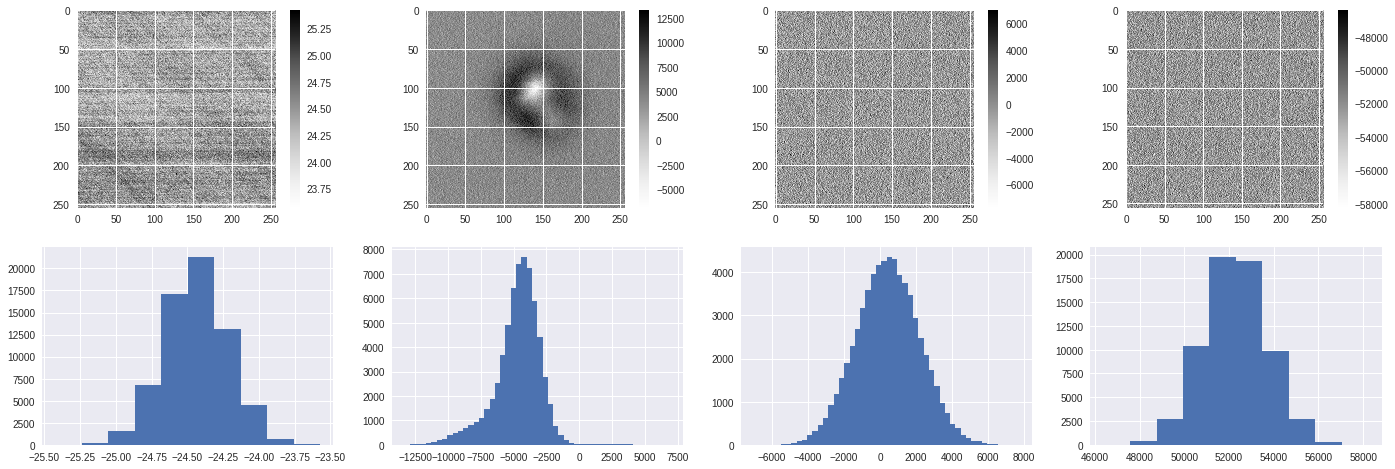

In [301]:

fig =plt.figure(figsize=(24, 8))
columns = 4
rows = 2

fig.add_subplot(rows,columns ,1)
plt.imshow(-pic1)
plt.colorbar()
fig.add_subplot(rows,columns ,2)
plt.imshow(-pic2)
plt.colorbar()
fig.add_subplot(rows,columns ,3)
plt.imshow(-pic3)
plt.colorbar()
fig.add_subplot(rows,columns ,4)
plt.imshow(-pic4)
plt.colorbar()

fig.add_subplot(rows,columns ,5)
plt.hist( pic1.flatten() )
fig.add_subplot(rows,columns ,6)
plt.hist( pic2.flatten(),50 )
fig.add_subplot(rows,columns ,7)
plt.hist( pic3.flatten(),50 )
fig.add_subplot(rows,columns ,8)
plt.hist( pic4.flatten() )


plt.show()